#**Vegetable Prices**

In this analysis we will determine:

1-if seasons contribute to vegetable prices.
2-if specific vegetables are bought more frequently than others.
3-what do the prices have in common with the vegetable type and what does it mean.

In [218]:
#Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp
import datetime as dt

#attain dataset from file
vegetable_prices = pd.read_csv('./dataset/prices.csv')

data = vegetable_prices
#test dataset for established connection
data.head()



,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [219]:
#I dentify the type of data we are dealing with:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


In [220]:
#format and clean the data so it displays a constant datatype

def convert_data_type(list_of_columns):
    for column in list_of_columns:
        data[column] = data[column].apply(float)


list_of_columns = data.columns.to_list()[1:]

convert_data_type(list_of_columns)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    float64
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    float64
 5   Brinjal                 287 non-null    float64
 6   Garlic                  287 non-null    float64
 7   Peas                    287 non-null    float64
 8   Methi                   287 non-null    float64
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    float64
dtypes: float64(10), object(1)
memory usage: 24.8+ KB


In [221]:
#split the data so we can have our quartery preformance (seasonal):
data['Price Dates'] = pd.to_datetime(data['Price Dates'],format='mixed')
data['quarter'] = data['Price Dates'].dt.to_period('Q')
quarter_preformance= data.groupby('quarter').mean().round(2)
quarter_preformance=quarter_preformance.drop('Price Dates',axis=1)

quarter_preformance

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
quarter,,,,,,,,,,
2023Q1,32.88,16.03,15.05,16.44,30.09,89.41,47.18,10.22,42.71,27.50
2023Q2,26.20,16.00,14.85,18.89,29.22,107.57,66.32,14.04,44.92,26.65
2023Q3,25.58,16.00,21.10,19.14,29.49,146.88,81.35,13.04,47.43,31.26
2023Q4,32.99,16.00,31.16,19.73,37.32,182.97,70.96,43.11,41.22,29.73
2024Q1,45.00,16.00,9.00,18.00,50.00,260.00,40.00,15.00,60.00,25.00


In [222]:
# Reset index to make 'quarter' a column
quarter_preformance = quarter_preformance.reset_index()

# Melt the dataframe to have vegetables and quarters in separate columns
df_melted = pd.melt(quarter_preformance, id_vars=['quarter'], var_name='Vegetable', value_name='Average Price')

#Remove level_0 and index by resetting index after melt
df_melted = df_melted.reset_index(drop=True)


# Create a bar graph to visualize the data:

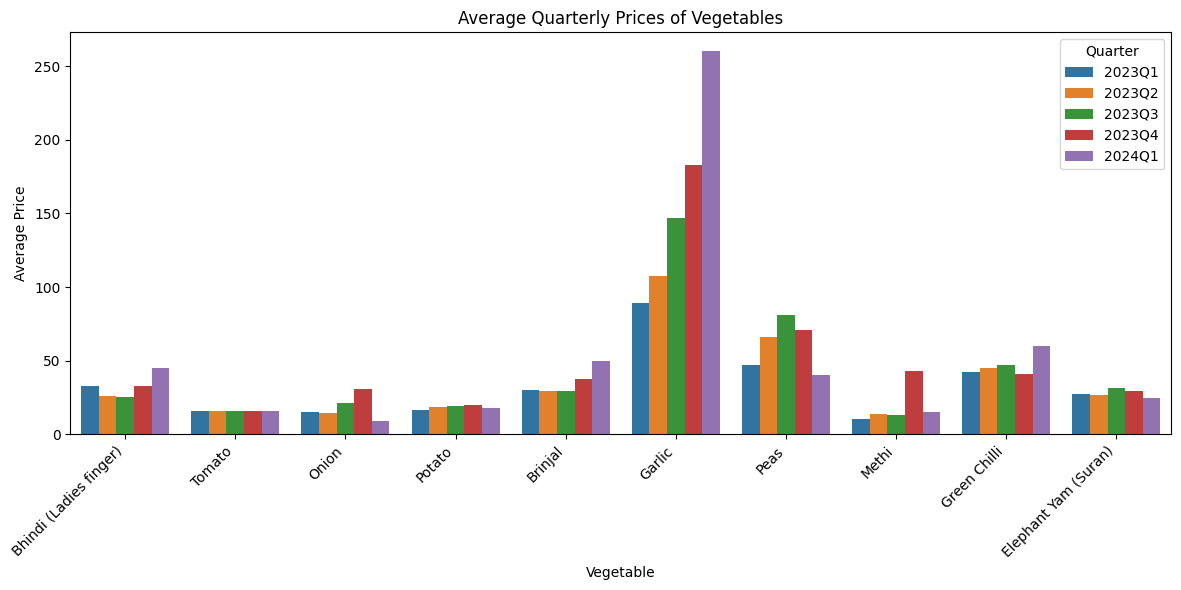

In [224]:
# Create the grouped bar graph using Seaborn
plt.figure(figsize=(12, 6))
sn.barplot(x='Vegetable', y='Average Price', hue='quarter', data=df_melted)
plt.xlabel("Vegetable")
plt.ylabel("Average Price")
plt.title("Average Quarterly Prices of Vegetables")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout()
plt.legend(title='Quarter')
plt.show()